In [1]:
# Imports
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Settings for graphs
sns.set_theme()
sns.set(rc={'figure.figsize':(16,10)}, style='white')
plt.figure(dpi=600)
sns.set_palette("Set2")

# Definitions
N_SEEDS = 5
SEEDS = [f"S{i}" for i in range(1, N_SEEDS+1)]
POPULATION_SIZE = 500
DATA_DIR = "../../evorobot-paper/data/tests/dynamic-limit/standard/"

<Figure size 9600x6000 with 0 Axes>

In [2]:
raw_fitness_distribution = []

for seed in SEEDS:
    seed_fitdist = np.load(f"{DATA_DIR}/fitnessDist{seed}.npy")
    raw_fitness_distribution.append(seed_fitdist)


In [3]:
n_checkpoints = 5 # each 20%

fitness_distribution = {}
for c in range(n_checkpoints):
    fitness_distribution[c] = []

for s in range(N_SEEDS):
    raw_fitdist = raw_fitness_distribution[s]
    generations = len(raw_fitdist)
    checkpoints = [checkpoint for checkpoint in range(0, generations, generations // n_checkpoints)]
    
    for c in range(len(checkpoints)-1):
        start, end = checkpoints[c], checkpoints[c+1]
        data = list(np.array(raw_fitdist[start:end]).flatten())
        fitness_distribution[c] += data

# for c, data in fitness_distribution.items():
#     data_t = np.transpose(data)
#     fitness_distribution[c] = np.array([np.average(row) for row in data_t])


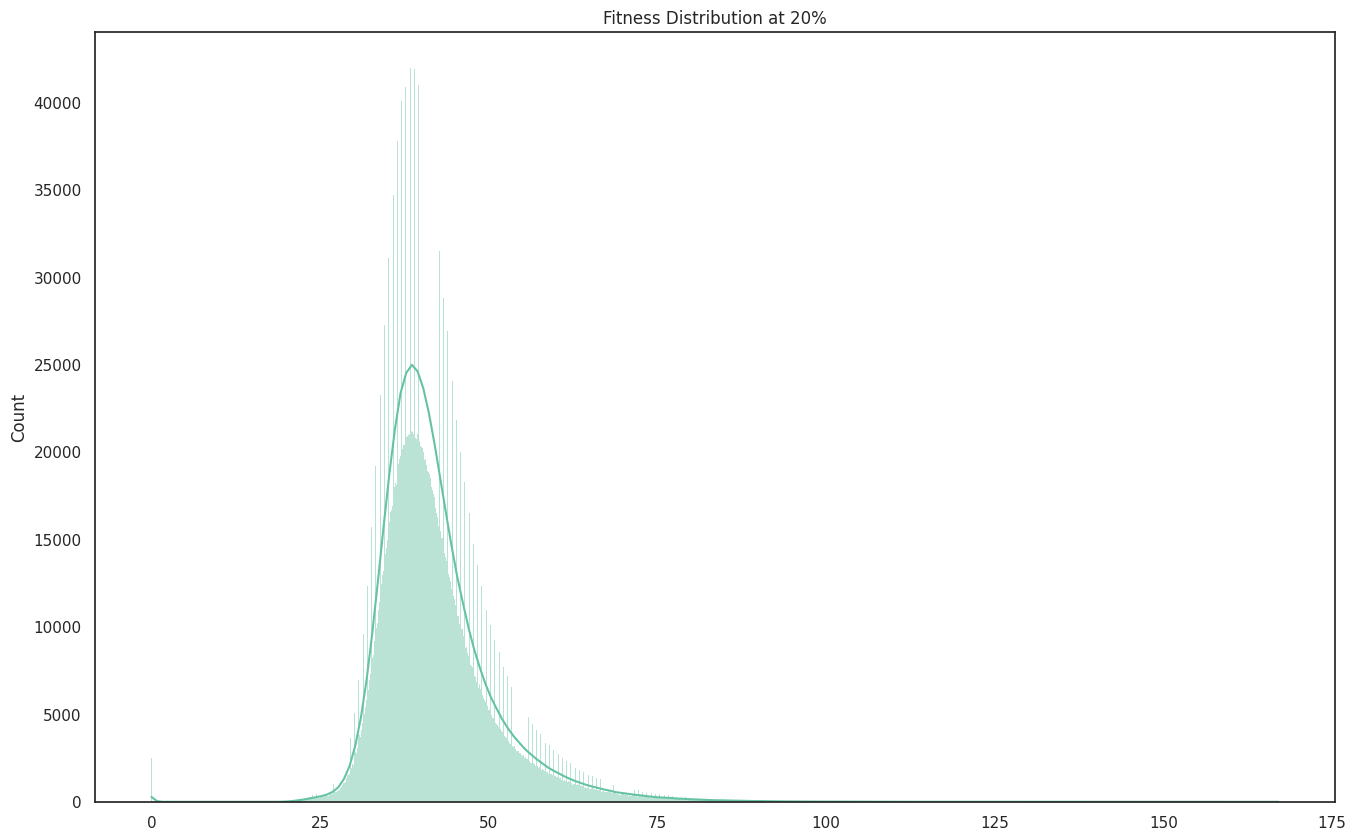

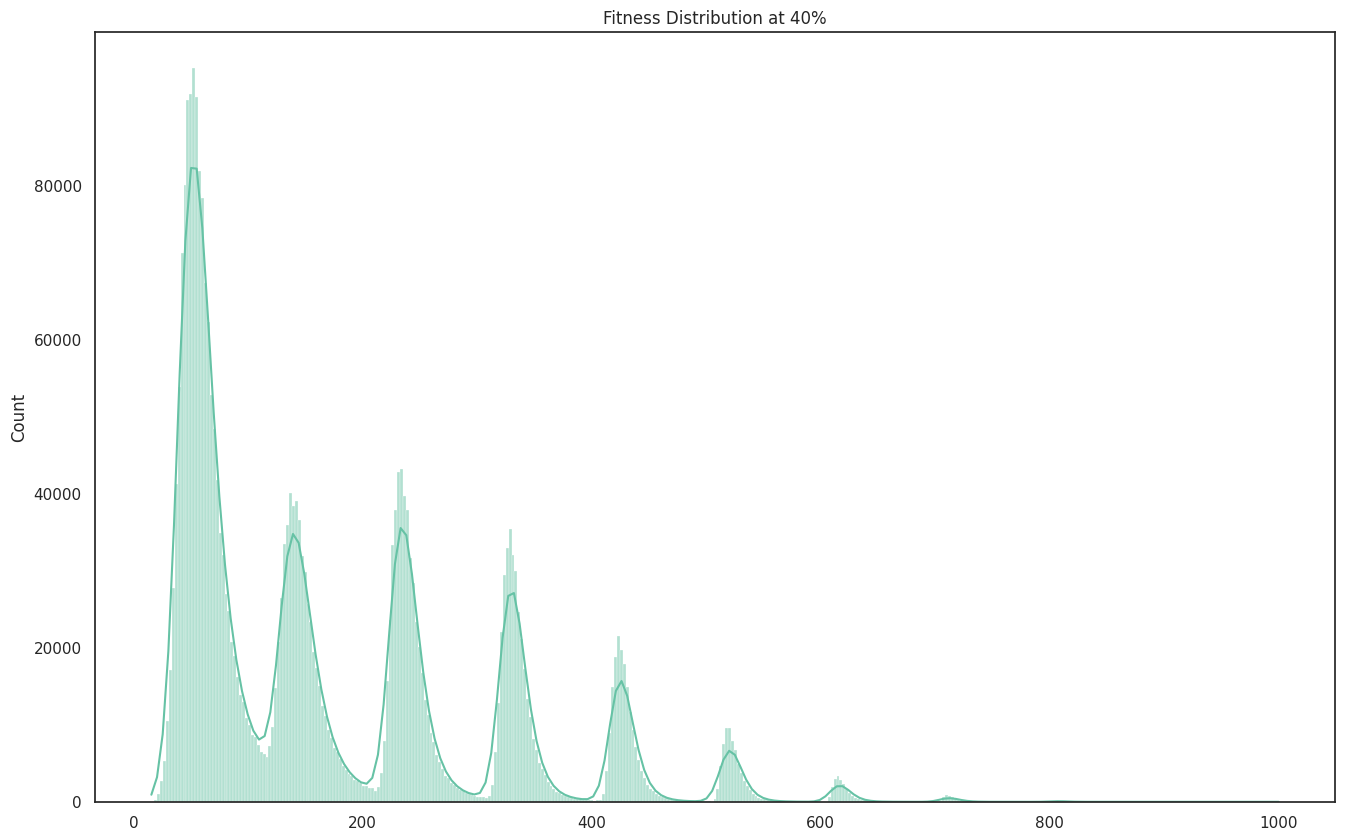

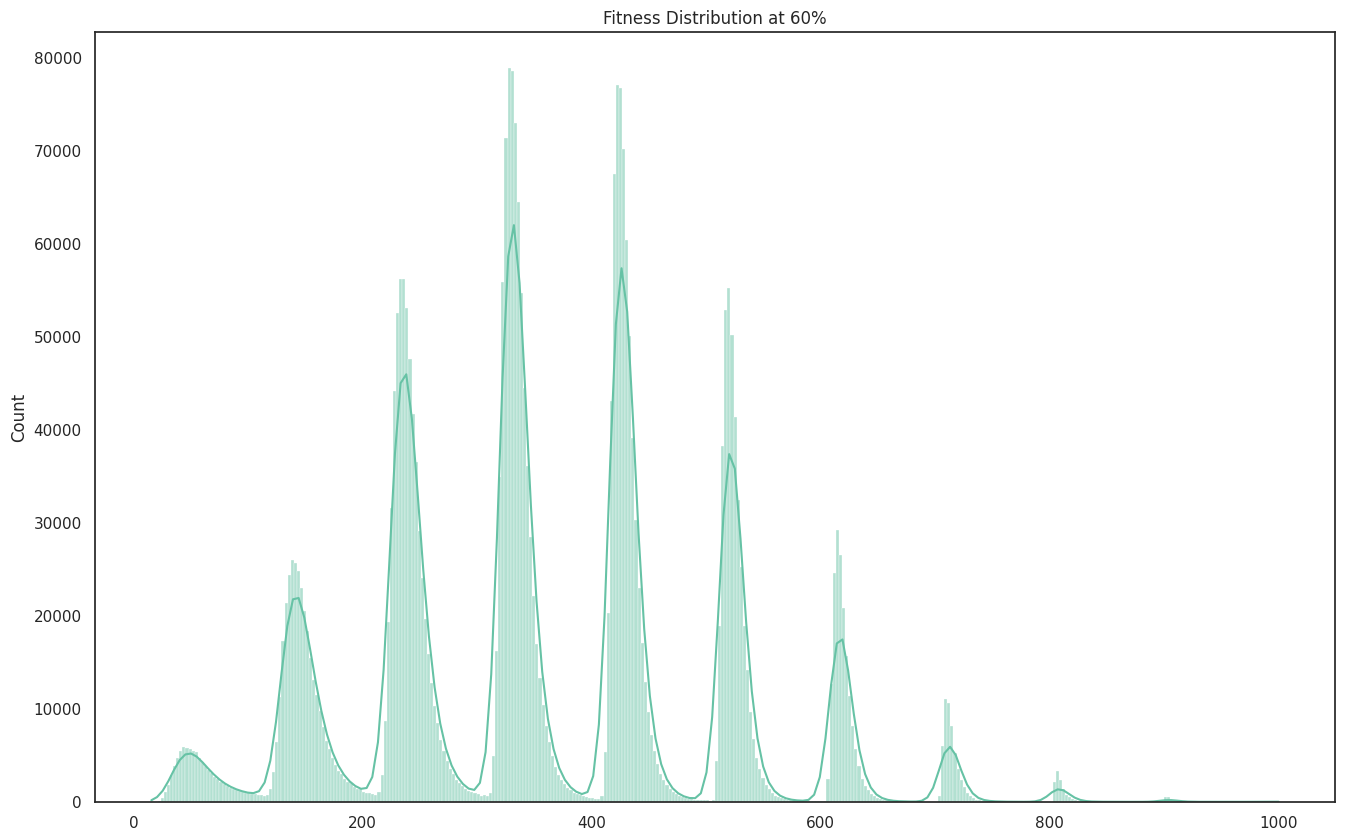

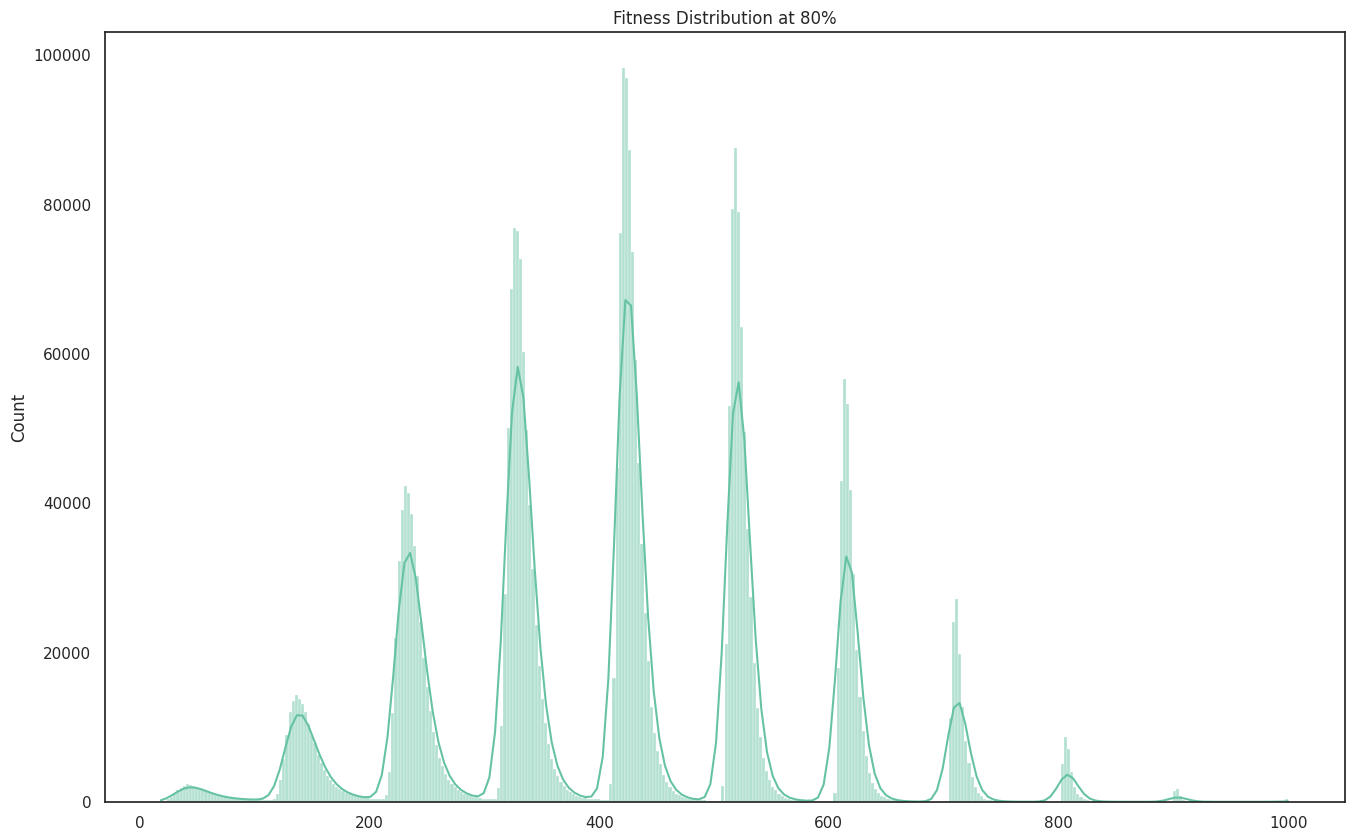

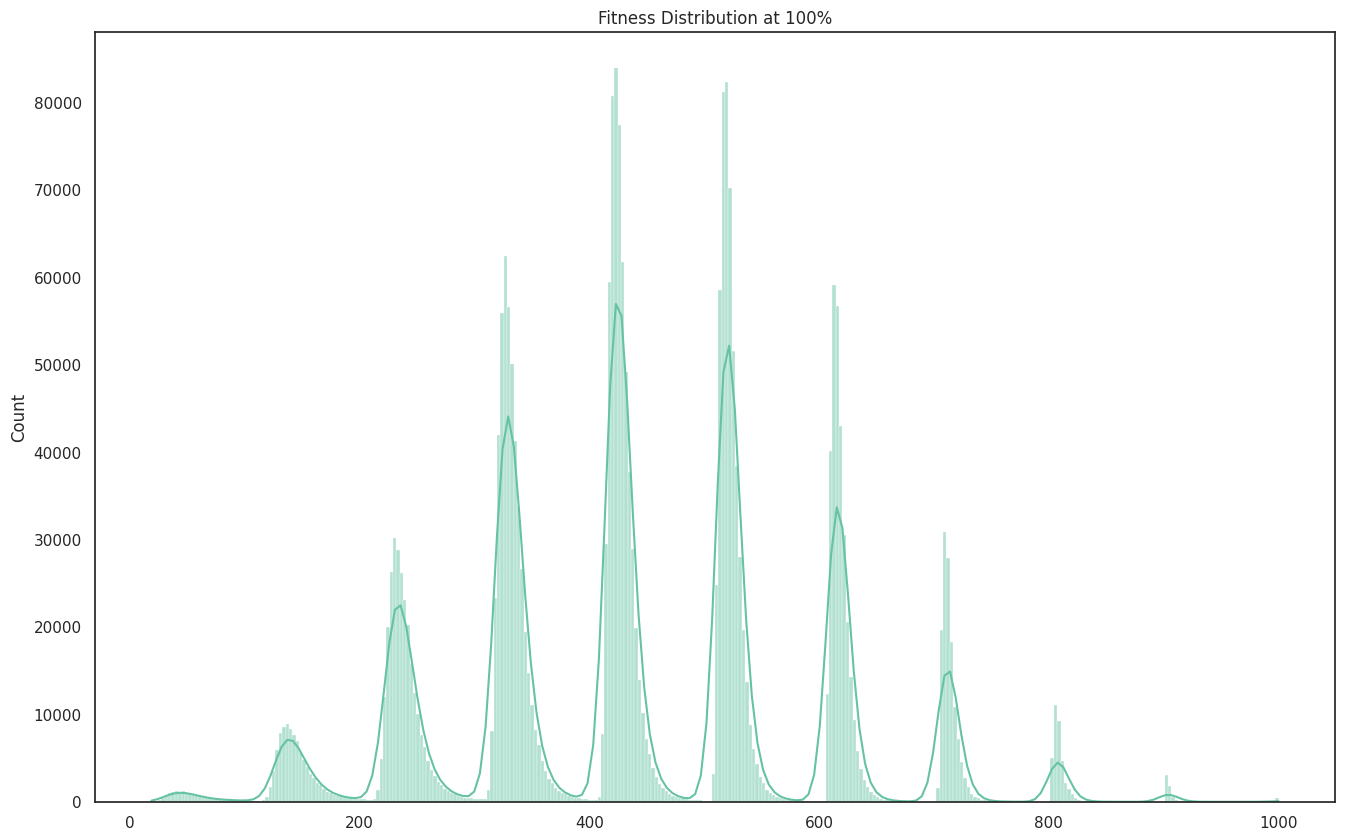

In [4]:
for checkpoint, data in fitness_distribution.items():
    sns.histplot(data, kde=True)
    plt.title(f"Fitness Distribution at {(checkpoint+1)*20}%")
    plt.show()